## Setting

In [1]:
using Revise
using NeuralVerification, LazySets, Plots
using NeuralVerification: ReLU, Id

┌ Info: Precompiling NeuralVerification [146f25fa-00e7-11e9-3ae5-fdbac6e12fa7]
└ @ Base loading.jl:1278
┌ Warning: Replacing docs for `LazySets.HPolytope :: Union{Tuple{Union{Polyhedra.HRepresentation{N}, Polyhedra.Polyhedron{N}}}, Tuple{N}} where N` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227
┌ Warning: Replacing docs for `LazySets.HPolyhedron :: Union{Tuple{Union{Polyhedra.HRepresentation{N}, Polyhedra.Polyhedron{N}}}, Tuple{N}} where N` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227
┌ Warning: Replacing docs for `Polyhedra.polyhedron :: Union{Tuple{Union{HPolyhedron{N,VN} where VN<:AbstractArray{N,1}, HPolytope{N,VN} where VN<:AbstractArray{N,1}}}, Tuple{N}} where N<:Real` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227
┌ Warning: Replacing docs for `Polyhedra.polyhedron :: Union{Tuple{VPolytope{N,VN} where VN<:AbstractArray{N,1}}, Tuple{N}} where N<:Real` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227


We consider a small network that encodes the function 
    
$$
f(x) = 24~\max(x + 1.5, 0) + 18.5
$$

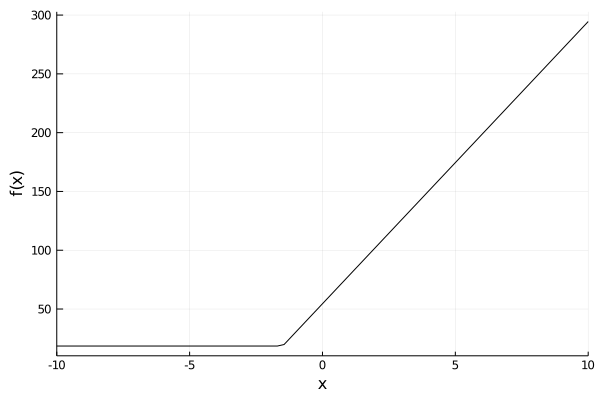

In [2]:
f(x) = 24*max(x + 1.5, 0) + 18.5

fig = plot()
plot!(fig, f, xlims=(-10.0, 10.0), xlab="x", ylab="f(x)", lab="", color=:black)

In [3]:
file = "small_nnet.nnet"
small_nnet = read_nnet(file, last_layer_activation = ReLU())

Network(NeuralVerification.Layer[NeuralVerification.Layer{ReLU,Float64}([1.0; 1.0], [1.5, 1.5], ReLU()), NeuralVerification.Layer{ReLU,Float64}([2.0 2.0; 2.0 2.0], [2.5, 2.5], ReLU()), NeuralVerification.Layer{ReLU,Float64}([3.0 3.0], [3.5], ReLU())])

In [4]:
length(small_nnet.layers)

3

In [5]:
dump(small_nnet)

Network
  layers: Array{NeuralVerification.Layer}((3,))
    1: NeuralVerification.Layer{ReLU,Float64}
      weights: Array{Float64}((2, 1)) [1.0; 1.0]
      bias: Array{Float64}((2,)) [1.5, 1.5]
      activation: ReLU ReLU()
    2: NeuralVerification.Layer{ReLU,Float64}
      weights: Array{Float64}((2, 2)) [2.0 2.0; 2.0 2.0]
      bias: Array{Float64}((2,)) [2.5, 2.5]
      activation: ReLU ReLU()
    3: NeuralVerification.Layer{ReLU,Float64}
      weights: Array{Float64}((1, 2)) [3.0 3.0]
      bias: Array{Float64}((1,)) [3.5]
      activation: ReLU ReLU()


The network has three layers and one output.

With the following fucntion we propagate an initial set $X_0 \subseteq \mathbb{R}$ through the neural network `network`. To simplify the discussion we consider that all layers use the ReLU activation function.

In [6]:
activate(Y, ::ReLU) = overapproximate(Rectification(concretize(Y)), Zonotope)
activate(Y, ::Id) = concretize(Y)

function forward_propagate(network, X0)
    Y = copy(X0)
    for Li in network.layers
        Wi, bi = Li.weights, Li.bias
        Y = Wi * Y + bi
        Y = activate(Y, Li.activation)
    end
    return Y
end

forward_propagate (generic function with 1 method)

## Solution for singleton values

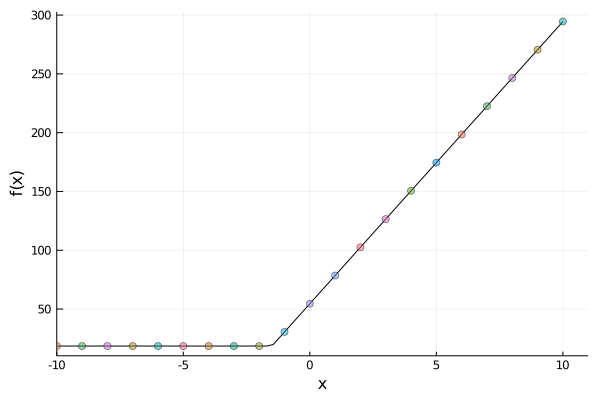

In [7]:
xin = [Singleton([α]) for α in -10:1.0:10]
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)])

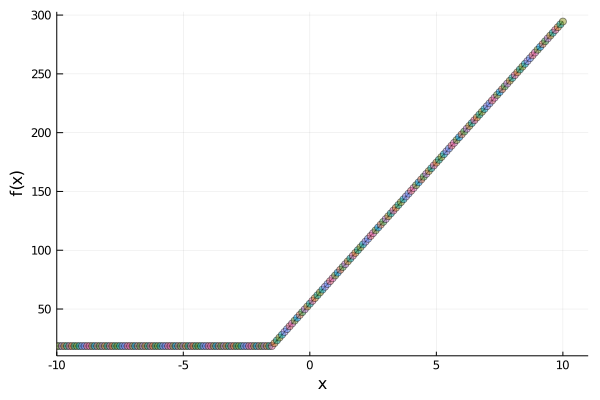

In [8]:
xin = [Singleton([α]) for α in -10:0.1:10]
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)])

## Solution for initial sets

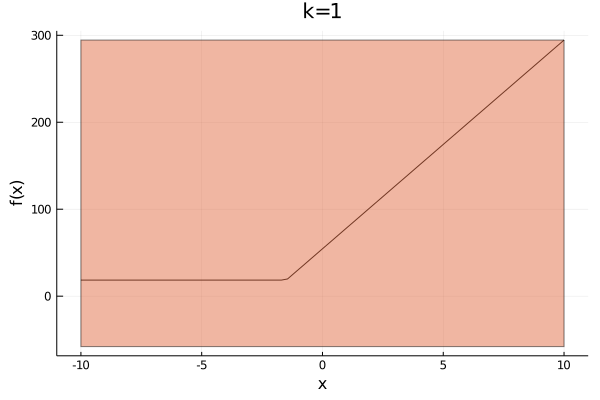

In [9]:
k = 1
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

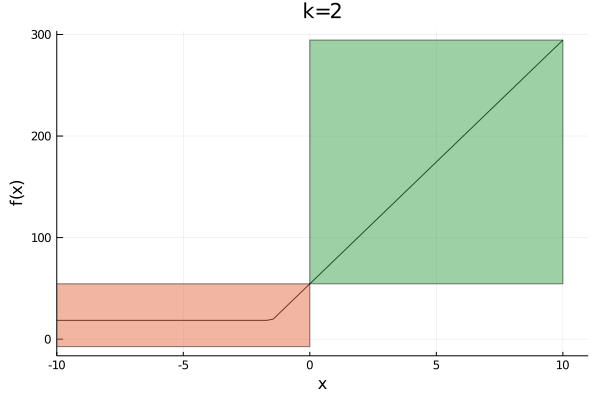

In [10]:
k = 2
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

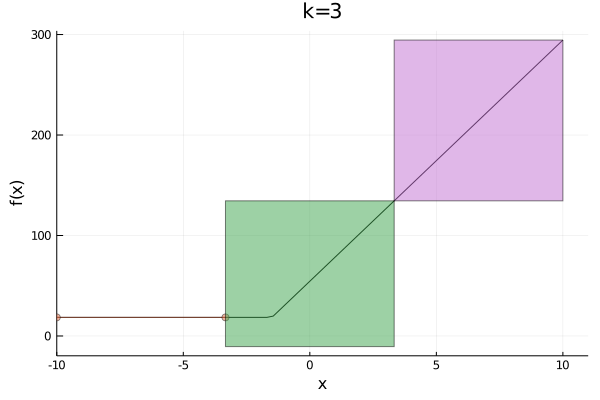

In [11]:
k = 3
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

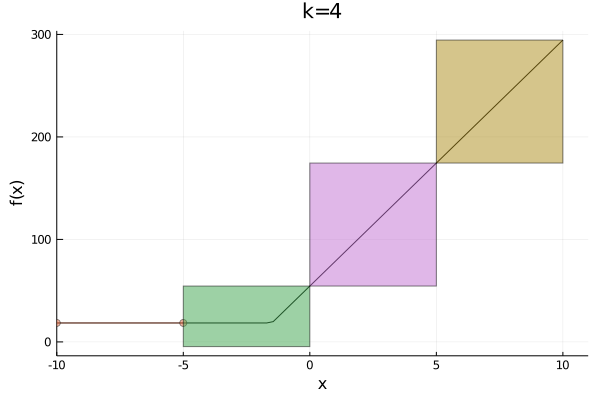

In [12]:
k = 4
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

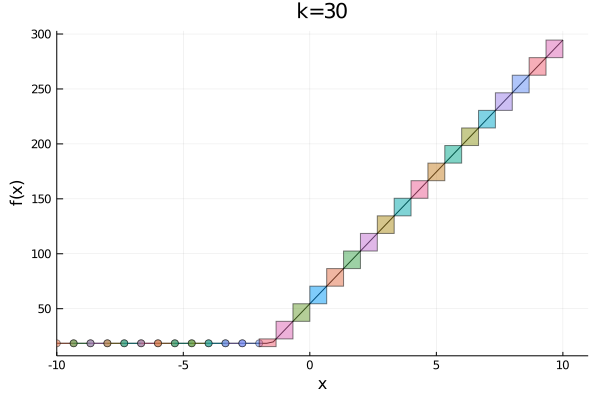

In [13]:
k = 30
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

## Backprop

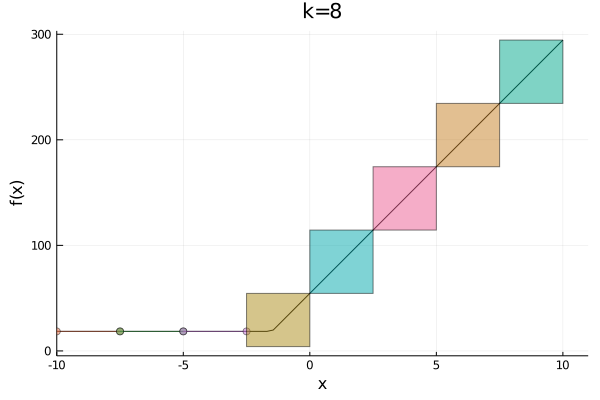

In [14]:
k = 8
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

Suppose that we take the output `xout[6]` and we would like to idenfity `xin[6]`.

In [15]:
yout = convert(Interval, xout[6])

Interval{Float64,IntervalArithmetic.Interval{Float64}}([114.5, 174.5])

In [16]:
yin = convert(Interval, xin[6])

Interval{Float64,IntervalArithmetic.Interval{Float64}}([2.5, 5])

1) Describe the set `wout` such that `relu(X) = yout`.

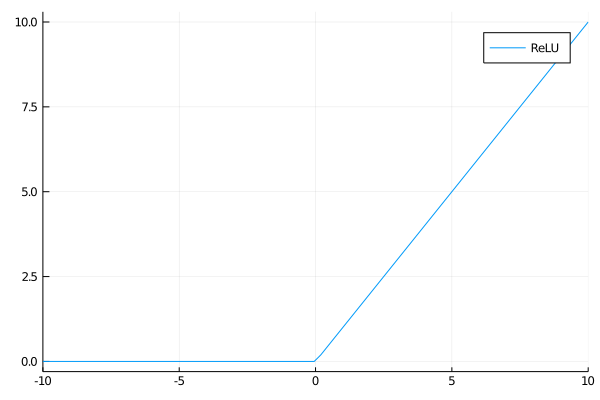

In [17]:
plot(x -> max(x, 0), xlims=(-10, 10), lab="ReLU")

In this case that set is again `yout`.

In [18]:
wout = copy(yout)

Interval{Float64,IntervalArithmetic.Interval{Float64}}([114.5, 174.5])

Observations. let $y_{out} = [a, b]$:

- if $a > 0$ then $relu^{-1}(y_{out}) = y_{out}$
- if $a \leq 0$ then $relu^{-1}(y_{out}) \subseteq [-\infty, b]$

To simplify we only considered the case when the output is just 1 variable.

2) Describe the set `wout′` such that `wout = W3 * wout′ + b3`.

In [19]:
W3 = small_nnet.layers[3].weights
b3 = small_nnet.layers[3].bias;

In [20]:
W3

1×2 Array{Float64,2}:
 3.0  3.0

In [21]:
b3

1-element Array{Float64,1}:
 3.5

In [22]:
# wout = 3*wout′[1] + 3*wout′[2] + 3.5

In [23]:
using ModelingToolkit
var = @variables x y

┌ Warning: Replacing docs for `LazySets.HPolyhedron :: Union{Tuple{Array{var"#s50",1} where var"#s50"<:Operation}, Tuple{Array{var"#s49",1} where var"#s49"<:Operation,Any}}` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227
┌ Warning: Replacing docs for `LazySets.HPolytope :: Union{Tuple{Array{var"#s50",1} where var"#s50"<:Operation}, Tuple{Array{var"#s49",1} where var"#s49"<:Operation,Any}}` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227


(x, y)

In [24]:
L1 = Hyperplane(min(wout) == 3*x + 3*y + 3.5, var)

Hyperplane{Float64,Array{Float64,1}}([-3.0, -3.0], -111.0)

In [25]:
L2 = Hyperplane(max(wout) == 3*x + 3*y + 3.5, var)

Hyperplane{Float64,Array{Float64,1}}([-3.0, -3.0], -171.0)

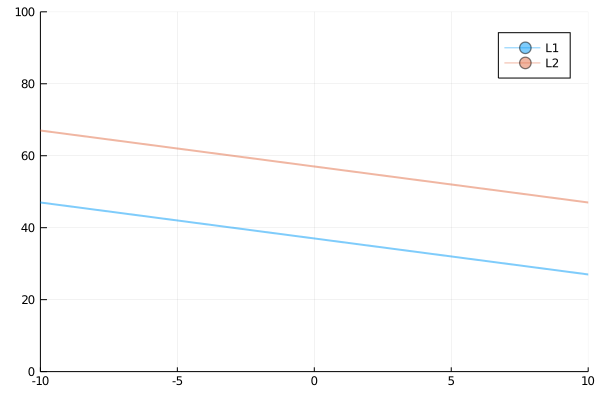

In [26]:
plot(L1, xlims=(-10.0, 10.0), ylims=(0.0, 100.0), lab="L1", lw=2.0)
plot!(L2, xlims=(-10.0, 10.0), ylims=(0.0, 100.0), lab="L2", lw=2.0)

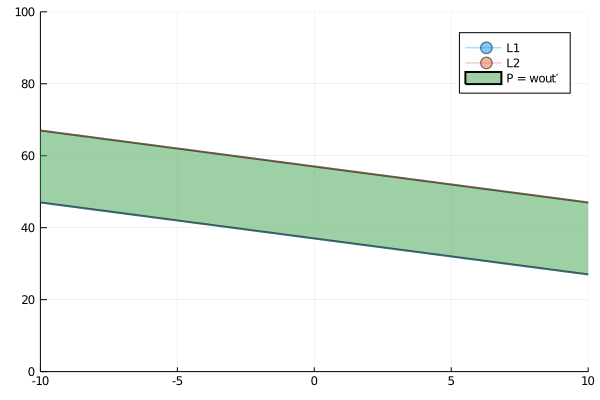

In [27]:
P = HPolyhedron([3*x + 3*y + 3.5 >= min(wout),  
                 3*x + 3*y + 3.5 <= max(wout)], var)

plot(L1, xlims=(-10.0, 10.0), ylims=(0.0, 100.0), lab="L1", lw=2.0)
plot!(L2, xlims=(-10.0, 10.0), ylims=(0.0, 100.0), lab="L2", lw=2.0)

plot!(P, xlims=(-10.0, 10.0), ylims=(0.0, 100.0), lab="P = wout′", lw=2.0)

In [28]:
wout′ = P

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([-3.0, -3.0], -111.0), HalfSpace{Float64,Array{Float64,1}}([3.0, 3.0], 171.0)])

In [29]:
111/3

37.0

In [30]:
171/3

57.0

We can check that `wout′` is the set we were looking for:

In [31]:
overapproximate(W3 * wout′ + b3, Interval)

Interval{Float64,IntervalArithmetic.Interval{Float64}}([114.5, 174.5])

In [32]:
wout

Interval{Float64,IntervalArithmetic.Interval{Float64}}([114.5, 174.5])

3) Describe the set `qout` such that `relu(qout) = wout′`.

Note that `wout′` is unbounded and goes to minus infinity and plus infinity. But since this set was obtained as the relu of some some set `qout`, it can't take negative values. So we should intersect it with the positive orthant.

First we intersect `wout′` with the positive quadrant.

In [33]:
wout′

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([-3.0, -3.0], -111.0), HalfSpace{Float64,Array{Float64,1}}([3.0, 3.0], 171.0)])

In [34]:
K₊ = HPolyhedron([x >= 0, y >= 0], var)

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([-1.0, 0.0], 0.0), HalfSpace{Float64,Array{Float64,1}}([0.0, -1.0], 0.0)])

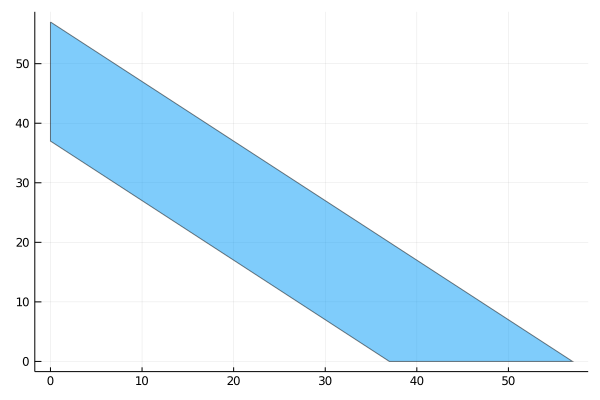

In [35]:
wout′₊ = intersection(wout′, K₊)
plot(wout′₊)

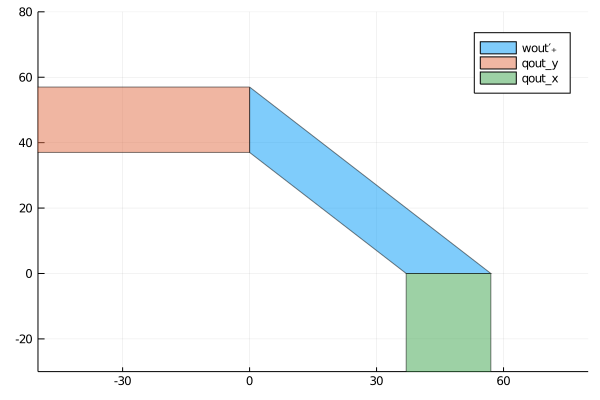

In [36]:
vert_y = vertices_list(overapproximate(wout′ ∩ Hyperplane(x == 0.0, var), Hyperrectangle))
vert_y = sort([vert_y[1][2], vert_y[2][2]])
qout_y = HPolyhedron([y >= vert_y[1], y <= vert_y[2], x <= 0], var)

vert_x = vertices_list(overapproximate(wout′ ∩ Hyperplane(y == 0.0, var), Hyperrectangle))
vert_x = sort([vert_x[1][1], vert_x[2][1]])
qout_x = HPolyhedron([x >= vert_x[1], x <= vert_x[2], y <= 0], var)

plot(wout′₊, xlims=(-50, 80), ylims=(-30, 80), lab="wout′₊")
plot!(qout_y, lab="qout_y")
plot!(qout_x, lab="qout_x")

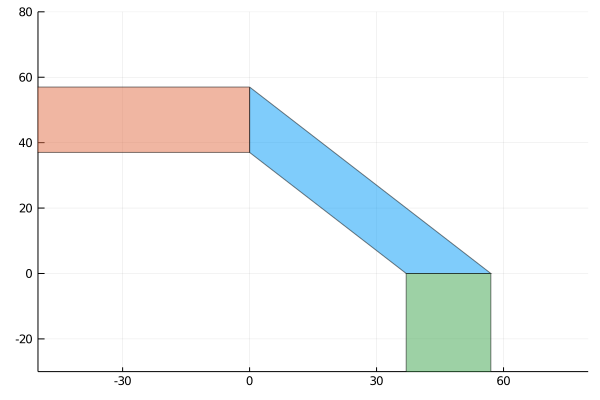

In [37]:
qout = UnionSetArray([wout′₊, qout_y, qout_x]);
plot(qout, xlims=(-50, 80), ylims=(-30, 80))

In [38]:
W3 = small_nnet.layers[3].weights
b3 = small_nnet.layers[3].bias;

W2 = small_nnet.layers[2].weights
b2 = small_nnet.layers[2].bias;

W1 = small_nnet.layers[1].weights
b1 = small_nnet.layers[1].bias;

In [39]:
b2

2-element Array{Float64,1}:
 2.5
 2.5

Now we want to find, or overapproximate, the set `qout′` such that:

`qout = W2 * qout′ + b2`

In [40]:
L1 = Hyperplane(vert_x[1] == 2*x + 2*y + 2.5, var)

Hyperplane{Float64,Array{Float64,1}}([-2.0, -2.0], -34.5)

In [41]:
vert_x

2-element Array{Float64,1}:
 37.0
 57.0

For the set in green:

Find $x, y:$ $2x + 2y + 2.5 \le 0$ and also $37 \le 2x + 2y + 2.5 \le 57$

$\Rightarrow$ the solution is the empty set $\Rightarrow$ we discard the set in green.

For the set in red:

In [42]:
vert_y

2-element Array{Float64,1}:
 37.0
 57.0

Find $x, y:$ $2x + 2y + 2.5 \le 0$ and also $37 \le 2x + 2y + 2.5 \le 57$

$\Rightarrow$ the solution is the empty set $\Rightarrow$ we discard the set in red.

In [43]:
wout′₊.constraints

4-element Array{HalfSpace{Float64,Array{Float64,1}},1}:
 HalfSpace{Float64,Array{Float64,1}}([-3.0, -3.0], -111.0)
 HalfSpace{Float64,Array{Float64,1}}([3.0, 3.0], 171.0)
 HalfSpace{Float64,Array{Float64,1}}([-1.0, 0.0], 0.0)
 HalfSpace{Float64,Array{Float64,1}}([0.0, -1.0], 0.0)

```
3x + 3y >= 111   ==> 2x + 2y >= 111*2/3
3x + 3y <= 171   ==> 2x + 2y <= 171*2/3
```

Sean $x, y$ las coord del conjunto que busco $qout'$

```
2x + 2y + 2.5 >= 111*2/3 + 2.5 = 76.5
2x + 2y + 2.5 <= 171*2/3 + 2.5 = 116.5
```

In [44]:
qout′ = HPolyhedron([2x + 2y >= 76.5, 2x + 2y <= 116.5], var)

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([-2.0, -2.0], -76.5), HalfSpace{Float64,Array{Float64,1}}([2.0, 2.0], 116.5)])

In [45]:
using Optim

┌ Warning: Replacing docs for `LazySets._line_search :: Tuple{Any,Any,Union{var"#s50", var"#s49", var"#s48"} where var"#s48"<:Line2D where var"#s49"<:Hyperplane where var"#s50"<:HalfSpace}` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227


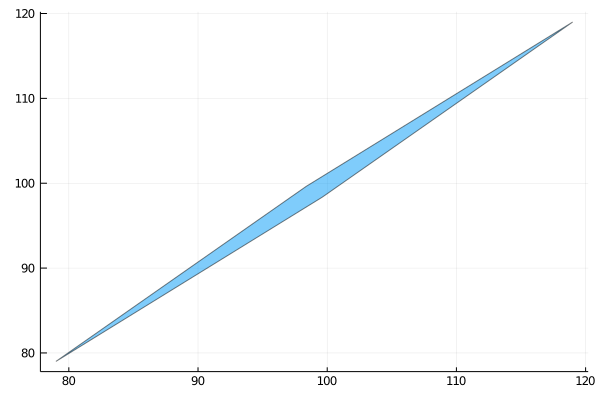

In [46]:
plot(overapproximate((W2 * qout′ + b2) ∩ K₊, PolarDirections(100)))

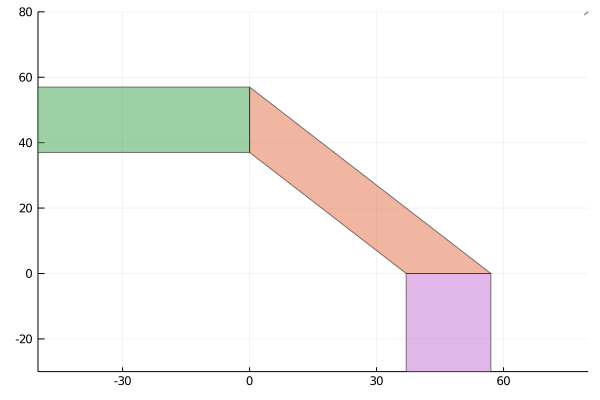

In [47]:
plot(overapproximate((W2 * qout′ + b2) ∩ K₊, PolarDirections(100)))

qout = UnionSetArray([wout′₊, qout_y, qout_x]);
plot!(qout, xlims=(-50, 80), ylims=(-30, 80))

---

## Generalization

In [48]:
using Polyhedra, CDDLib

Let $Y = \{y \in \mathbb{R}^m : Cy \leq d\}$ be a polyhedron for some $C \in \mathbb{R}^{p\times m}$, $d \in \mathbb{R}^p$.

Let $A \in \mathbb{R}^{m\times n}$ for $m, n \geq 1$ without further assuptions on $m, n$. Let $b \in \mathbb{R}^m$.

We want to describe the set $X \subseteq \mathbb{R}^n$ defined as:

$X := \{x \in \mathbb{R}^n : y = Ax + b,~\text{ for some } y \in Y\}$

First we translate $Y$ to $\tilde{Y} := \{\tilde{y} \in \mathbb{R}^m : \tilde{y} = y - b,~~\forall y \in Y\}.$ This is simple for polyhedra with `translate`.

$X := \{x \in \mathbb{R}^n : y = Ax,~\text{ for some } y \in \tilde{Y}\}$

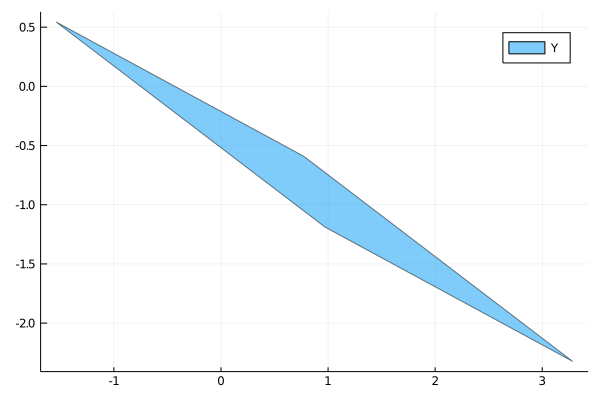

In [49]:
Y = convert(HPolyhedron, rand(Zonotope, dim=2));
plot(Y, lab="Y")

In [50]:
b = [1.0, 1.0]
Yt = LazySets.translate(Y, b)

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([-0.4404388961288467, -0.8977825899274295], -0.6986711456692091), HalfSpace{Float64,Array{Float64,1}}([0.4404388961288467, 0.8977825899274295], 1.1483012770613081), HalfSpace{Float64,Array{Float64,1}}([0.5679399128924, 0.8230700184940362], 1.343839120707914), HalfSpace{Float64,Array{Float64,1}}([-0.5679399128924, -0.8230700184940362], -0.9641792429574679)])

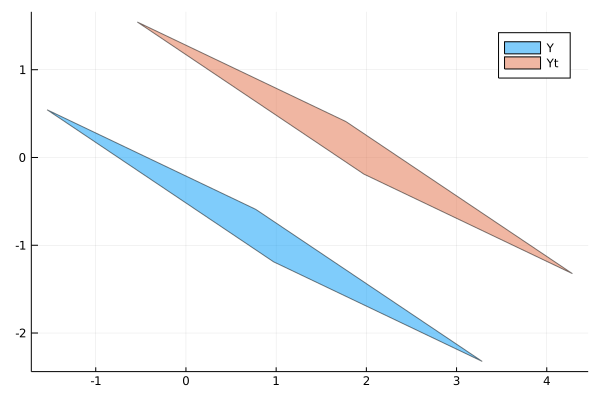

In [51]:
plot!(Yt, lab="Yt")

$X := \{x \in \mathbb{R}^n : y = Ax,~\text{ for some } y \in \tilde{Y}\}$

with $\tilde{Y} = \{y \in \mathbb{R}^m : Cy \leq \tilde{d}\}$, $C \in \mathbb{R}^{p\times m}$, $\tilde{d} \in \mathbb{R}^p$.

=> we use Fourier-Motzkin to eliminate variables

In [52]:
using ModelingToolkit

In [53]:
y = Ax # m ecuaciones Ax - y <= 0  && -Ax + y <= 0

Cy <= d̃ # p desigualdades

LoadError: UndefVarError: Ax not defined

R^{n+m} : (x, y)

In [54]:
using LinearAlgebra
using LazySets: translate, default_cddlib_backend

function inverse_affine_map(Y::HPolyhedron{N},
                            A::AbstractMatrix{N}, b::AbstractVector{N};
                            backend=nothing,
                            algorithm=nothing,
                            prune=true) where {N}
    
    if backend == nothing
        backend = default_cddlib_backend(N)
    end

    if algorithm == nothing
        algorithm = Polyhedra.FourierMotzkin()
    elseif !(algorithm <: EliminationAlgorithm)
        error("the algorithm $algorithm is not a valid elimination algorithm;
              choose among any of $(subtypes(Polyhedra.EliminationAlgorithm))")
    end

    m, n = size(A)

    Ỹ = translate(Y, -b)
    C, d̃ = tosimplehrep(Ỹ)
    p = size(C, 1)
    @assert m == size(C, 2)

    Imm = Matrix(one(N) * I, m, m)
    Zpn = zeros(N, p, n)
    r = vcat(zeros(N, 2m), d̃)

    M = [A  -Imm;   # Ax - y <= 0
        -A   Imm;   # -Ax + y <= 0
        Zpn    C];  # Cy <= d̃

    Qlift = HPolyhedron(M, r)
    Q_cdd = polyhedron(Qlift, backend=backend)
    W_cdd = Polyhedra.eliminate(Q_cdd, n+1:n+m, algorithm)
    W = convert(HPolyhedron, W_cdd)
    if prune
        success = remove_redundant_constraints!(W)
        if !success
            #error("elimination of redundant constraints didn't succeed")
            return EmptySet{N}(n)
        end
    end
    return W
end

function inverse_affine_map(Y::Interval{N},
                            A::AbstractMatrix{N}, b::AbstractVector{N};
                            kwargs...) where {N}
    inverse_affine_map(convert(HPolyhedron, Y), A, b; kwargs...)
end

function inverse_affine_map(Y::UnionSetArray{N, PT},
                            A::AbstractMatrix{N}, b::AbstractVector{N};
                            kwargs...) where {N, PT<:HPolyhedron{N}}
    m = length(Y.array)
    out = Vector{PT}()
    @inbounds for i in 1:m
        X = inverse_affine_map(Y.array[i], A, b; kwargs...)
        if !(X isa EmptySet)
            push!(out, X)
        end
    end
    return UnionSetArray(out)
end

inverse_affine_map (generic function with 3 methods)

We apply this function to step 2) above, 
    
> 2) Describe the set `wout′` such that `wout = W3 * wout′ + b3`.

In [55]:
wout

Interval{Float64,IntervalArithmetic.Interval{Float64}}([114.5, 174.5])

In [56]:
Y = convert(HPolyhedron, wout)

HPolyhedron{Float64,LazySets.Arrays.SingleEntryVector{Float64}}(HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}[HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([1.0], 174.5), HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([-1.0], -114.5)])

In [57]:
T = inverse_affine_map(Y, W3, b3)

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0], 57.0), HalfSpace{Float64,Array{Float64,1}}([-1.0, -1.0], -37.0)])

In [58]:
Q = polyhedron(T, backend=LazySets.default_cddlib_backend(Float64))

Polyhedron CDDLib.Polyhedron{Float64}:
2-element iterator of Polyhedra.HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([1.0, 1.0], 57.0)
 HalfSpace([-1.0, -1.0], -37.0)

In [59]:
algorithm = Polyhedra.FourierMotzkin()

FourierMotzkin()

In [60]:
LazySets.dim(T)

2

In [61]:
W_cdd = Polyhedra.eliminate(Q, 3:3, algorithm)
W = convert(HPolyhedron, W_cdd)
W.constraints

LoadError: The CDD implementation of Fourier-Motzkin only support removing the last dimensions

In [62]:
remove_redundant_constraints!(W)

LoadError: UndefVarError: W not defined

In [63]:
W.constraints

LoadError: UndefVarError: W not defined

### Test

In [64]:
wout

Interval{Float64,IntervalArithmetic.Interval{Float64}}([114.5, 174.5])

In [65]:
woutP = convert(HPolyhedron, wout)

HPolyhedron{Float64,LazySets.Arrays.SingleEntryVector{Float64}}(HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}[HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([1.0], 174.5), HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([-1.0], -114.5)])

In [66]:
X = inverse_affine_map(woutP, W3, b3)

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0], 57.0), HalfSpace{Float64,Array{Float64,1}}([-1.0, -1.0], -37.0)])

In [67]:
wout′

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([-3.0, -3.0], -111.0), HalfSpace{Float64,Array{Float64,1}}([3.0, 3.0], 171.0)])

## Algorithm

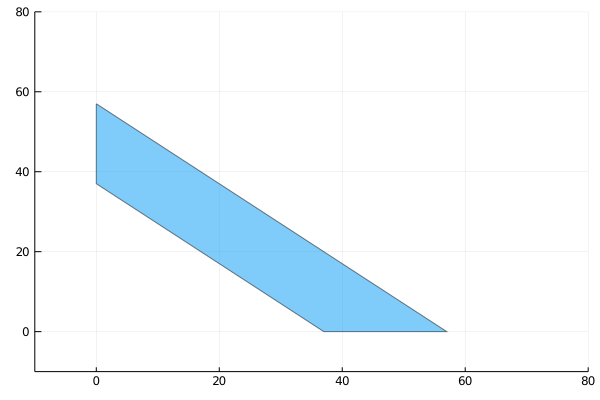

In [68]:
wout′₊
plot(wout′₊, xlims=(-10, 80), ylims=(-10, 80))

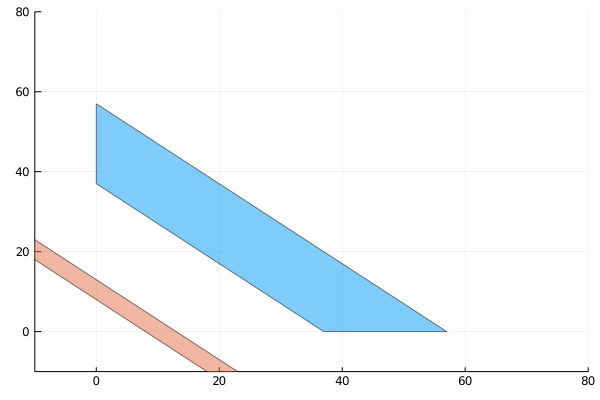

In [69]:
out = inverse_affine_map(wout′₊, W2, b2)
plot!(out)

In [70]:
out.constraints

2-element Array{HalfSpace{Float64,Array{Float64,1}},1}:
 HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0], 13.0)
 HalfSpace{Float64,Array{Float64,1}}([-1.0, -1.0], -8.0)

glp_simplex: unable to recover undefined or non-optimal solution


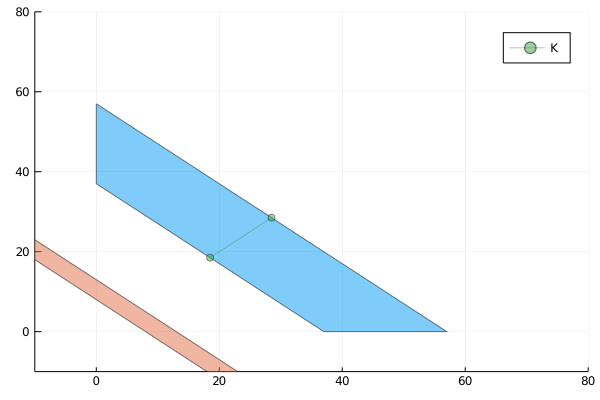

In [71]:
K = affine_map(W2, out, b2, algorithm="elimination")
K.constraints
plot!(K, lab="K")

In [72]:
vertices_list(K)

2-element Array{Array{Float64,1},1}:
 [18.5, 18.5]
 [28.5, 28.5]

In [73]:
Kinv = inverse_affine_map(K, W2, b2)

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([-1.0, -1.0], -8.0), HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0], 13.0)])

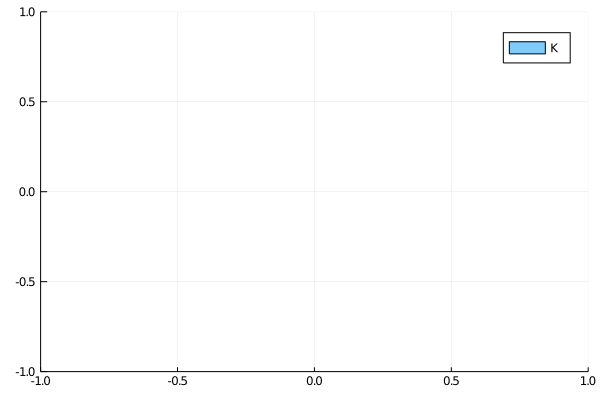

In [74]:
Kinv = inverse_affine_map(K, W2, b2)

wout′₊
plot(wout′₊, xlims=(-10, 80), ylims=(-10, 80))

plot(Kinv, lab="K")

In [75]:
out = inverse_affine_map(qout_x, W2, b2)

EmptySet{Float64}(2)

In [76]:
out = inverse_affine_map(qout_y, W2, b2)

EmptySet{Float64}(2)

---

### Inverse RELU

In [77]:
LazySets.Approximations.DIR_EAST(Float32)

2-element Array{Float32,1}:
 1.0
 0.0

In [78]:
using LazySets: dim
using LazySets.Approximations: DIR_EAST, DIR_WEST, DIR_SOUTH, DIR_NORTH
var = @variables x y

function inverse_rectification(Y::HPolyhedron{N}) where {N}
    if dim(Y) == 1
        return inverse_rectification(overapproximate(Y, Interval))
    end
    @assert dim(Y) == 2 "inverse rectification implemented for dimension $(dim(Y))"
    
    K₊ = HPolyhedron([x >= 0, y >= 0], var)
    Y₊ = intersection(Y, K₊)
    
    Rx = intersection(Y₊, Hyperplane(y == 0, var))
    Rx = Interval(-ρ(DIR_WEST(N), Rx), ρ(DIR_EAST(N), Rx))
    
    Ry = intersection(Y₊, Hyperplane(x == 0, var))
    Ry = Interval(-ρ(DIR_SOUTH(N), Ry), ρ(DIR_NORTH(N), Ry))

    out = [Y₊]
    if !isempty(Rx)
        Tx = HPolyhedron([min(Rx) <= x, x <= max(Rx), y <= 0], var)
        push!(out, Tx)
    end

    if !isempty(Ry)
        Ty = HPolyhedron([min(Ry) <= y, y <= max(Ry), x <= 0], var)
        push!(out, Ty)
    end

    return UnionSetArray(out)
end

function inverse_rectification(Y::Interval{N}) where {N}
    if min(Y) ≥ 0
        out = Y
    elseif max(Y) ≤ 0
        out = Interval(zero(N), zero(N))
    else
        out = Interval(-Inf, max(Y))
    end
    return convert(HPolyhedron, out)
end

function inverse_rectification(Y::UnionSetArray{N, PT}) where {N, PT<:HPolyhedron{N}}
    m = length(Y.array)
    out = Vector{PT}()
    @inbounds for i in 1:m
        Ri = inverse_rectification(Y.array[i])
        if Ri isa HPolyhedron
            push!(out, Ri)
        else  # union of polyhedra
            for X in Ri.array
                push!(out, X)
            end
        end
    end
    return UnionSetArray(out)
end

inverse_rectification (generic function with 3 methods)

In [79]:
wout′inverse_rectification

LoadError: UndefVarError: wout′inverse_rectification not defined

In [80]:
out = inverse_rectification(wout′);
length(array(out))

3

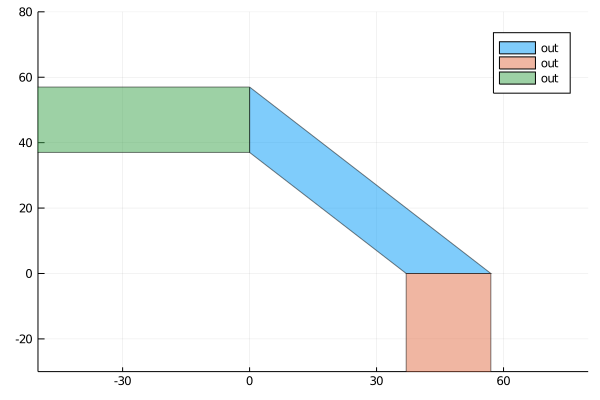

In [81]:
#plot(wout′₊, xlims=(-50, 80), ylims=(-30, 80), lab="wout′₊")
#plot!(qout_y, lab="qout_y")
#plot!(qout_x, lab="qout_x")

plot(out, lab="out", xlims=(-50, 80), ylims=(-30, 80))

## Algorithm

In [82]:
yout

Interval{Float64,IntervalArithmetic.Interval{Float64}}([114.5, 174.5])

In [83]:
aux = inverse_rectification(yout)
aux = inverse_affine_map(aux, W3, b3)

aux = inverse_rectification(aux) # union
aux = inverse_affine_map(aux, W2, b2) # union

aux = inverse_rectification(aux)
aux = inverse_affine_map(aux, W1, b1) # union, 1 element

UnionSetArray{Float64,HPolyhedron{Float64,Array{Float64,1}}}(HPolyhedron{Float64,Array{Float64,1}}[HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([1.0], 5.0), HalfSpace{Float64,Array{Float64,1}}([-1.0], -2.5)])])

In [84]:
length(aux.array)

1

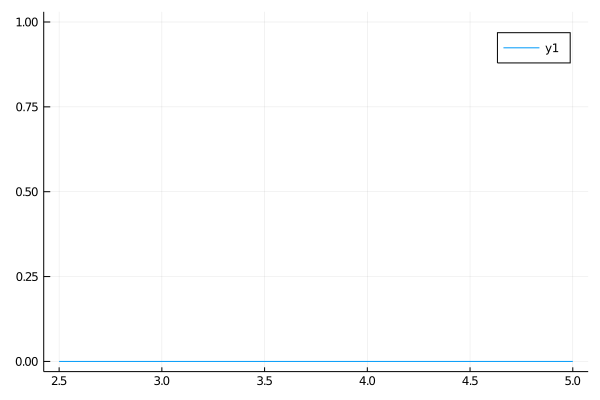

In [85]:
plot(aux.array[1])

In [86]:
yin

Interval{Float64,IntervalArithmetic.Interval{Float64}}([2.5, 5])

In [87]:
aux

UnionSetArray{Float64,HPolyhedron{Float64,Array{Float64,1}}}(HPolyhedron{Float64,Array{Float64,1}}[HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([1.0], 5.0), HalfSpace{Float64,Array{Float64,1}}([-1.0], -2.5)])])

We obtain the exact initial set: 

In [88]:
isequivalent(yin, aux.array[1]) 

true

## Implementation of backward-propagate

In [89]:
function backward_propagate(network, Y0)
    X = copy(Y0)
    for Li in small_nnet.layers[end:-1:1]
        @assert Li.activation == ReLU()
        X = inverse_rectification(X)

        Wi, bi = Li.weights, Li.bias
        X = inverse_affine_map(X, Wi, bi)
    end

    # output
    if X isa UnionSetArray && length(X.array) == 1
        if dim(X) == 1
            return overapproximate(X.array[1], Interval)
        else
            return X.array[1]
        end
    else
        return X
    end
end

backward_propagate (generic function with 1 method)

In [90]:
backward_propagate(small_nnet, yout)

Interval{Float64,IntervalArithmetic.Interval{Float64}}([2.5, 5])

Now we backpropagate a family of sets that cover the region of interest.

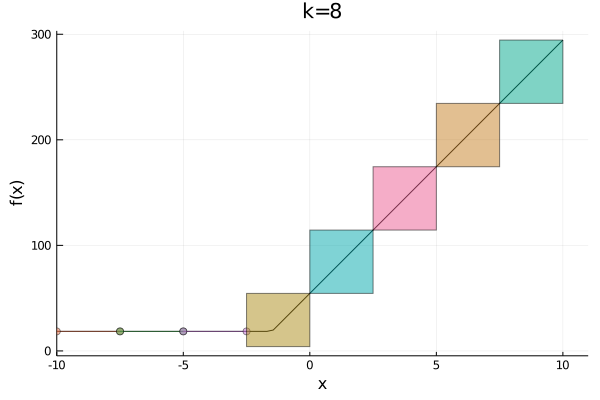

In [91]:
k = 8
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

In [92]:
xin_bp = [backward_propagate(small_nnet, convert(Interval, xouti)) for xouti in xout];

In [93]:
typeof.(xin_bp)

8-element Array{DataType,1}:
 UnionSetArray{Float64,HPolyhedron{Float64,Array{Float64,1}}}
 UnionSetArray{Float64,HPolyhedron{Float64,Array{Float64,1}}}
 UnionSetArray{Float64,HPolyhedron{Float64,Array{Float64,1}}}
 UnionSetArray{Float64,HPolyhedron{Float64,Array{Float64,1}}}
 Interval{Float64,IntervalArithmetic.Interval{Float64}}
 Interval{Float64,IntervalArithmetic.Interval{Float64}}
 Interval{Float64,IntervalArithmetic.Interval{Float64}}
 Interval{Float64,IntervalArithmetic.Interval{Float64}}

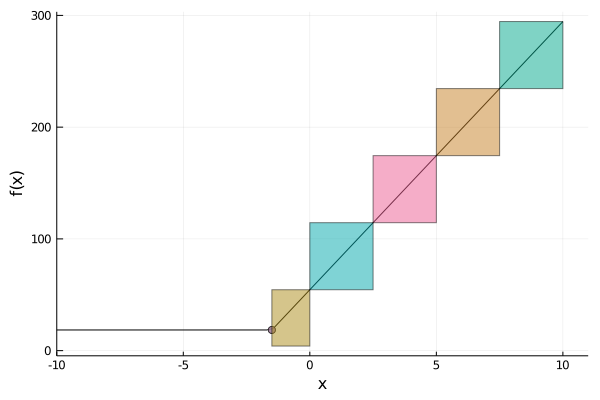

In [94]:
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin_bp, xout)])